# FoldX part

In [ ]:
### Input list of variants from 

In [44]:
import re
import os
import subprocess

amino_acids = {
    "A": "Ala",
    "C": "Cys",
    "D": "Asp",
    "E": "Glu",
    "F": "Phe",
    "G": "Gly",
    "H": "His",
    "I": "Ile",
    "K": "Lys",
    "L": "Leu",
    "M": "Met",
    "N": "Asn",
    "P": "Pro",
    "Q": "Gln",
    "R": "Arg",
    "S": "Ser",
    "T": "Thr",
    "V": "Val",
    "W": "Trp",
    "Y": "Tyr"
}

amino_acid_dict = {
    'Ala': 'A',
    'Arg': 'R',
    'Asn': 'N',
    'Asp': 'D',
    'Cys': 'C',
    'Gln': 'Q',
    'Glu': 'E',
    'Gly': 'G',
    'His': 'H',
    'Ile': 'I',
    'Leu': 'L',
    'Lys': 'K',
    'Met': 'M',
    'Phe': 'F',
    'Pro': 'P',
    'Ser': 'S',
    'Thr': 'T',
    'Trp': 'W',
    'Tyr': 'Y',
    'Val': 'V'
}


list_of_var = """
Arg137Trp
Arg137Trp
Arg137Trp
Ile187del
Leu903Arg
Leu202del
Leu903Arg
Arg1004*
Ile512Thrfs*4
Pro348Ser
Pro348Ser
Trp396*

Ser230Glnfs*4


Glu943*
Cys426Trp
=
Ala95Val
Arg137Trp
Arg1914His
Arg1914His
2926del
Arg137Trp
Arg1914His
C1199Y
C1199Y
E803K
His227Pro
His227Pro
Arg1914His


R1914H
Thr1918Pro


Glu447Lys
C1199Y
Arg501*
Ser230Glnfs*4
Arg1914His
Ile984Leufs*8
Arg1914His
Gly254Asp
Gly340Arg
Pro650Ser
2347_2348delLLinsL 
Arg873Trp

Arg941His
Leu903Arg
Arg1914His
Arg1914His
Arg1914His
Ser6*
Ser1129Phe
Trp845Cys

Ala95Val
Leu271Pro
Ser414Phe
Ser414Phe
Arg517Cys
Arg517His
Arg517His
Thr731Pro
Pro777His
Pro777His
Pro937Ala
His940Pro
Ile984Ser
Leu1055Pro
Ile1121Met
Ser1129Phe
Ser1129Phe
Ser1178Arg
Gln1201Pro
Leu1708Pro
Arg1914His
Arg1914Gly
Ala1921Pro

Gln2322Hisfs*18
Cys256Tyr
Trp845Cys
Trp845Cys
Tyr142Ter
Phe167LeufsTer10

Gly340Arg
His855_Gln859del
His855_Gln859del
Trp1095Ter
Ala1146GlnfsTer14
Arg941His
Phe231ThrfsTer35
Ser343Asn
Val393ArgfsTer2
Tyr747Asp
Gln1039Ter
Ser230Glnfs*4
Arg1914His
Ser1129Phe
His940Pro
R517C
C1199Y
Leu422Pro
Arg1914His
Arg1914His
Tyr1578dup
Arg64His
Pro937Ala
Gln1201Pro
Gln1201Pro
Val519Glu
Ala103Thr
Ser544ValfsTer11
Gly877Val
R517C
Ile984Ser
Ile984Ser
Ile984Ser
Arg873Trp
Cys1199Tyr
R916X
Q2232E
R1073C
K1517E
E2269K
Y1495H
Arg137Trp
Arg137Trp
Arg137Trp
Ser230Glnfs*4
Leu903Arg
Leu1055Pro
Glu943*
Leu1055Pro
Ile984Ser


Pro777His
Val842Phe
Leu1055Pro


Val2145_Glu2237del
Val1528Glyfs*2
Ile1121Met
Lys284Ter
Trp396Arg
Arg1004*
Gln678*
Ser976Profs*16
Val253Gly
Glu943*
M2204Ifs*3
Q196X

Trp583*
Trp583*
Ser230fs*4
Arg1914His
Arg1914His
S2166Ffs*
Phe167Cysfs7


Leu1818fsX16

Thr2280Thr
Thr2280Thr
Trp135*
His1053Arg
Glu2189*
Gly254Asp
Val892Phe
Pro650Ser
T1254Hfs*16 
Arg873Trp

Arg941His
Leu903Arg


Ser544fs
Arg1914His
Met1Leu
Arg1914His
Gln134Arg
Trp934*
Leu271Pro
Ile984Leufs*8
Glu2080*
Ser1681Glnfs*37
Glu2269*
Glu2269*
Thr731Pro
Pro777His
Pro777His

His940Pro
Glu943*
Glu1676Aspfs*10

Ser1129Phe
Ser1129Phe

Gln1201Pro

Arg510*
Leu2293Cysfs*9
Ser230Glnfs*4

Trp1850Glyfs*32
Phe671Cys
Trp845Cys
Ala1921Pro
Cys1199Tyr
Ala857Val
Cys1199Tyr
Arg1914Cys
Cys1199Tyr
Cys1199Tyr
Cys1199Tyr
Asp2287Tyr

Pro454Arg
Arg1914His
Thr1918Pro
Arg2335Trp
2346delLeu
Glu804Gly

Gly292Glu
His940Pro
L1549P
216-248del
Arg517Cys
Arg1914His
Arg1914His
Tyr1578dup
Val568Ile
Pro937Ala
Gln1201Pro
Gln1201Pro
Val519Glu
Phe1707Ile
Ala409Val
Gln1430Ter
E151K
Arg136Gly
Arg405*
Arg405*

Cys1199Tyr
C1199Y
P454R
M1743V
P1474L
E1521Q
T1097M

"""

In [45]:
my_list = [element for element in list_of_var.split('\n') if element]

PTC_list = [element for element in my_list if "*" in element or "Ter" in element or "X" in element or "fs" in element]
list_PTC_sorted = [element for element in my_list if element not in PTC_list]

In [46]:
new_list = []

for element in list_PTC_sorted:
    for old, new in amino_acids.items():
        element = re.sub(rf"{old}(?=\d|$)", new, element)
    new_list.append(element)

list_PTC_sorted = new_list

In [47]:
del_list = [element for element in list_PTC_sorted if "del" in element]
list_PTC_del_sorted = [element for element in list_PTC_sorted if element not in del_list]

In [48]:
list_PTC_del_sorted

list_PTC_del_sorted = [x for x in list_PTC_del_sorted if '=' not in x]

dup_list = [element for element in list_PTC_del_sorted if "dup" in element]
list_PTC_del_dup_sorted = [element for element in list_PTC_del_sorted if element not in dup_list]

In [49]:
new_data = []

for item in list_PTC_del_dup_sorted:
    first = amino_acid_dict[item[:3]]
    second = amino_acid_dict[item[-3:]]
    new_item = first + item[3:-3] + second
    new_data.append(new_item)

list_PTC_del_dup_sorted = new_data
list_PTC_del_dup_sorted_uniq = list(set(list_PTC_del_dup_sorted))
list_PTC_del_dup_sorted_uniq
list_PTC_del_dup_sorted_uniq_chain = [x[0] + 'A' + x[1:] for x in list_PTC_del_dup_sorted_uniq]
list_PTC_del_dup_sorted_uniq_chain = ';'.join(list_PTC_del_dup_sorted_uniq_chain)

list_PTC_del_dup_sorted_uniq_chain

'RA873W;GA877V;WA396R;VA842F;LA903R;YA1495H;AA95V;WA845C;QA1201P;VA253G;AA857V;HA1053R;IA1121M;LA1055P;CA256Y;TA2280T;AA409V;TA1097M;PA650S;LA271P;VA568I;GA254D;RA517H;RA517C;RA1914H;MA1L;GA292E;PA1474L;IA984S;SA414F;EA447K;LA422P;RA64H;DA2287Y;SA1129F;PA777H;AA1921P;RA941H;EA804G;GA340R;EA151K;LA1549P;EA1521Q;MA1743V;QA2232E;SA1178R;RA1073C;RA1914C;HA227P;VA892F;YA747D;FA671C;RA1914G;SA343N;PA454R;PA937A;RA2335W;FA1707I;RA136G;EA803K;PA348S;CA1199Y;HA940P;LA1708P;CA426W;AA103T;KA1517E;TA731P;EA2269K;QA134R;VA519E;RA137W;TA1918P'

In [50]:
list_PTC_del_dup_sorted_uniq_chain

'RA873W;GA877V;WA396R;VA842F;LA903R;YA1495H;AA95V;WA845C;QA1201P;VA253G;AA857V;HA1053R;IA1121M;LA1055P;CA256Y;TA2280T;AA409V;TA1097M;PA650S;LA271P;VA568I;GA254D;RA517H;RA517C;RA1914H;MA1L;GA292E;PA1474L;IA984S;SA414F;EA447K;LA422P;RA64H;DA2287Y;SA1129F;PA777H;AA1921P;RA941H;EA804G;GA340R;EA151K;LA1549P;EA1521Q;MA1743V;QA2232E;SA1178R;RA1073C;RA1914C;HA227P;VA892F;YA747D;FA671C;RA1914G;SA343N;PA454R;PA937A;RA2335W;FA1707I;RA136G;EA803K;PA348S;CA1199Y;HA940P;LA1708P;CA426W;AA103T;KA1517E;TA731P;EA2269K;QA134R;VA519E;RA137W;TA1918P'

In [51]:
# Set the path to the mutated_list folder
mutated_list_path = 'mutated_list'
# Split the string into a list of mutations

list_PTC_del_dup_sorted_uniq_chain = list_PTC_del_dup_sorted_uniq_chain.split(';')

# Loop through all mutations in the list
for i, mutation in enumerate(list_PTC_del_dup_sorted_uniq_chain):
    # Create a new txt file in the mutated_list folder with the name 'individual_list_X.txt'
    filename = f'individual_list_{i}.txt'
    with open(os.path.join(mutated_list_path, filename), 'w') as f:
        f.write(f'{mutation};\n')

In [23]:
# Loop through all mutations in the list
for i, mutation in enumerate(list_PTC_del_dup_sorted_uniq_chain):
    # Create a new txt file in the mutated_list folder with the name 'individual_list_X.txt'
    filename = f'individual_list_{i}.txt'
    with open(os.path.join(output_folder, filename), 'w') as f:
        f.write(f'{mutation}\n')

In [20]:
input_folder = "mutated_list"
output_folder = "Mutated_folder_PDB"
pdb_file = "NBAS_wt_Repair.pdb"
stability_file = "stability_report.txt"
foldx_path = "C://Program Files//foldx//foldx_5.exe"  # Change this to the full path to the FoldX executable on your system

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

with open(stability_file, "w") as f:
    f.write("Mutation\tStability\n")

for filename in os.listdir(input_folder):
    if filename.endswith(".txt"):
        mutation_name = os.path.splitext(filename)[0]
        individual_list_file = os.path.join(input_folder, filename)
        mutant_pdb_file = os.path.join(output_folder, f"{mutation_name}.pdb")
        stability_output_file = f"{mutation_name}_ST.fxout"
        subprocess.run([foldx_path, "--command=BuildModel", f"--pdb={pdb_file}", f"--mutant-file={individual_list_file}", f"--output-file={mutant_pdb_file}"])
        subprocess.run([foldx_path, "--command=Stability", f"--pdb={mutant_pdb_file}", f"--output-file={mutation_name}"])
        with open(stability_output_file, "r") as f:
            lines = f.readlines()
            stability = lines[-1].split("\t")[1]
            with open(stability_file, "a") as f:
                f.write(f"{mutation_name}\t{stability}\n")

FileNotFoundError: [Errno 2] No such file or directory: 'individual_list_0_ST.fxout'

# domain 

In [5]:
var = """Arg137Trp
Arg137Trp
Arg137Trp
Leu903Arg
Arg137Trp
Arg137Trp
Gly254Asp
Gly340Arg
Pro650Ser
Arg873Trp
Arg941His
Leu903Arg
Ser1129Phe
Trp845Cys
Leu271Pro
Thr731Pro
Pro777His
Pro777His
His940Pro
Ser1129Phe
Ser1129Phe
Gln1201Pro
Cys256Tyr
Trp845Cys
Trp845Cys
Gly340Arg
Ser343Asn
Tyr747Asp
Ser1129Phe
His940Pro
R517C
Leu422Pro
Arg1914His
Arg1914His
Arg64His
Pro937Ala
Gln1201Pro
Gln1201Pro
Val519Glu
Ala103Thr
R517C
Ile984Ser
Cys1199Tyr
Q2232E
R1073C
K1517E
E2269K
Y1495H
"""
var1 = """Arg137Trp
Arg137Trp
Arg137Trp
Leu903Arg
Trp396Arg
Val253Gly
Gly254Asp
Val892Phe
Pro650Ser
Arg873Trp
Arg941His
Leu903Arg
Met1Leu
Arg1914His
Leu271Pro
Thr731Pro
Pro777His
Pro777His
His940Pro
Ser1129Phe
Ser1129Phe
Gln1201Pro
Phe671Cys
Trp845Cys
Ala1921Pro
Arg1914Cys
Arg1914His
Arg2335Trp
Gly292Glu
His940Pro
L1549P
Arg517Cys
Arg1914His
Arg1914His
Val568Ile
Pro937Ala
Gln1201Pro
Gln1201Pro
Val519Glu
Phe1707Ile
E151K
Arg136Gly
Cys1199Tyr
P454R
M1743V
P1474L
E1521Q
T1097M
"""

In [6]:
import re

numbers = re.findall(r'\d+', var1)
meanings = []

for number in numbers:
    number = int(number)
    if 0 <= number <= 87:
        meanings.append('N-terminal')
    elif 88 <= number <= 371:
        meanings.append('b-propeller')
    elif 372 <= number <= 725:
        meanings.append('N-intermediate')
    elif 726 <= number <= 1365:
        meanings.append('Sec39')
    elif 1366 <= number <= 2371:
        meanings.append('C-terminal')

meanings_str = '\n'.join(meanings)
print(meanings_str)

b-propeller
b-propeller
b-propeller
Sec39
N-intermediate
b-propeller
b-propeller
Sec39
N-intermediate
Sec39
Sec39
Sec39
N-terminal
C-terminal
b-propeller
Sec39
Sec39
Sec39
Sec39
Sec39
Sec39
Sec39
N-intermediate
Sec39
C-terminal
C-terminal
C-terminal
C-terminal
b-propeller
Sec39
C-terminal
N-intermediate
C-terminal
C-terminal
N-intermediate
Sec39
Sec39
Sec39
N-intermediate
C-terminal
b-propeller
b-propeller
Sec39
N-intermediate
C-terminal
C-terminal
C-terminal
Sec39


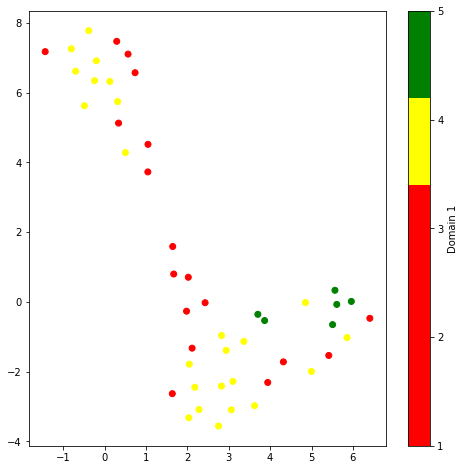

In [11]:
import pandas as pd
import umap
from matplotlib.colors import ListedColormap


# Load your data into a Pandas DataFrame
data = pd.read_csv('Variants_for_UMAP.csv')

# Select the columns you want to use for the UMAP projection
features = data[['Stability 1', 'Stability 2', 'ALF', 'liver', 'Optic Atrophy', 'Nanism', 'OsImp', 'BoneD', 'DBAge', 'Hу-GE', 'R-NK', 'IQ imp', 'genital abnorm', 'dtract abnorm', 'neuro', 'DevDel', 'skin anom', 'PH']]

# Create a UMAP projection of the data
reducer = umap.UMAP(n_neighbors=10, min_dist=0.5, metric='correlation', random_state=42)
embedding = reducer.fit_transform(features)

# Create a custom color map
cmap = ListedColormap(['red' if i < 4 else 'yellow' if i == 4 else 'green' for i in range(1, 6)])

# Plot the UMAP projection
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=data['Domain 1'], cmap=cmap)
plt.colorbar(ticks=range(1, 6), label='Domain 1')
plt.show()

In [6]:
def create_shorter_list(list):
  """
  Creates a list with shorter presentation from a list.

  Args:
    list: The list to be converted.

  Returns:
    The list with shorter presentation.
  """

  shorter_list = []
  current_number = list[0]
  for number in list:
    if number == current_number + 1:
      continue
    else:
      shorter_list.append(str(current_number) + "-" + str(number - 1))
      current_number = number
  shorter_list.append(str(current_number))

  return shorter_list


list = [1, 2, 3, 5, 6, 7, 8, 10, 11, 13, 14, 15]
shorter_list = create_shorter_list(list)

print(shorter_list)


['1-0', '1-2', '3-4', '5-6', '7-9', '10-12', '13-14', '15']


In [7]:
ordered_list = [1,2,3,5,6,7,8,10,11,13,14,15]
start = end = None
result = []

for i in ordered_list:
    if start is None:
        start = i
        end = i
    elif i == end + 1:
        end = i
    else:
        result.append(f"{start}-{end}")
        start = i
        end = i

result.append(f"{start}-{end}")
shorter_list = ", ".join(result)

print(shorter_list)  # Output: 1-3, 5-8, 10-11, 13-15

1-3, 5-8, 10-11, 13-15


In [9]:
#!/usr/bin/env python3

# standard library modules
import sys, errno, re, json, ssl
from urllib import request
from urllib.error import HTTPError
from time import sleep

BASE_URL = "https://www.ebi.ac.uk:443/interpro/api/entry/InterPro/?page_size=200"

def output_list():
  #disable SSL verification to avoid config issues
  context = ssl._create_unverified_context()

  next = BASE_URL
  last_page = False

  
  attempts = 0
  while next:
    try:
      req = request.Request(next, headers={"Accept": "application/json"})
      res = request.urlopen(req, context=context)
      # If the API times out due a long running query
      if res.status == 408:
        # wait just over a minute
        sleep(61)
        # then continue this loop with the same URL
        continue
      elif res.status == 204:
        #no data so leave loop
        break
      payload = json.loads(res.read().decode())
      next = payload["next"]
      attempts = 0
      if not next:
        last_page = True
    except HTTPError as e:
      if e.code == 408:
        sleep(61)
        continue
      else:
        # If there is a different HTTP error, it wil re-try 3 times before failing
        if attempts < 3:
          attempts += 1
          sleep(61)
          continue
        else:
          sys.stderr.write("LAST URL: " + next)
          raise e

    for i, item in enumerate(payload["results"]):
      sys.stdout.write(item["metadata"]["accession"] + "\n")
    # Don't overload the server, give it time before asking for more
    if next:
      sleep(1)

if __name__ == "__main__":
  output_list()


ValueError: arrays must all be same length